In [4]:
import os, sys, copy, random
sys.path.append("../")
%load_ext autoreload
%autoreload 2
import cv2
import numpy as np
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
from modules.Interproc import DBInterface
from modules.Interproc import GuiviewState
from modules.ControlTracking import TrackFactory
from modules.ControlDisplay import Display
from modules.ImgUtils import (filter_pixels_circle
                              ,crop_img)

In [170]:
from modules.AnalysisHelpers import multiPlot

from modules.AnalysisHelpers import ( imgToColors
                                     ,channelsToColorStr
                                     ,cvtPlot)

from modules.AnalysisHelpers import ( colorCube
                                    ,SubprocColorCube
                                    ,subprocColorCube )

from modules.AnalysisHelpers import ( buildConfusionData
                                     ,buildConfusionPlotData
                                     ,buildRegionMarkers
                                     ,confusionPlotByViews
                                     ,confusionPlotByImage )

from modules.AnalysisHelpers import PixelConfusionMatrix

In [8]:
#Load GS data into workbook
DATA_DIR = "../data/misc/books/cc-gallery-2/"

gsDb = DBInterface(os.path.join(DATA_DIR,"interproc.db"))
all_data = gsDb.selectAll()
listGS = [ pickle.loads(d[1]) for d in all_data]                
[_gs.frameCounter for _gs in listGS]

[0, 0, 0, 0, 189, 256]

In [13]:
#define varaibles
threshes2 = [
    ((29, 86, 6), (64, 255, 255))
    ,((20, 60, 6),(40, 255, 255))
            ]
threshes1 = [((29, 86, 6), (64, 255, 255))]

In [17]:
pcm2 = buildConfusionData(listGS[3], threshes2)
pcm1 = buildConfusionData(listGS[3], threshes1)
print '\n2-Threshes\n'
pcm2.displayVals()
print '\n1-Thresh\n'
pcm1.displayVals()


2-Threshes

                                         True          False
                        307200           1517         305683
       Positive            700            662             38
       Negative         306500         305645            855

1-Thresh

                                         True          False
                        307200           1517         305683
       Positive            689            662             27
       Negative         306511         305656            855


In [18]:
plotData2 = buildConfusionPlotData(pcm2)

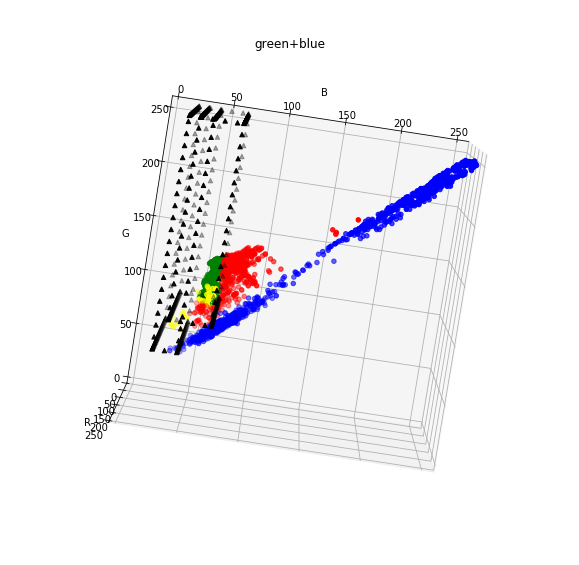

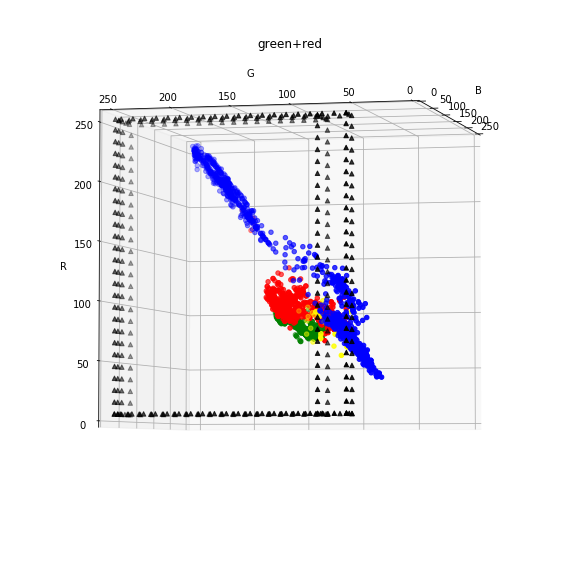

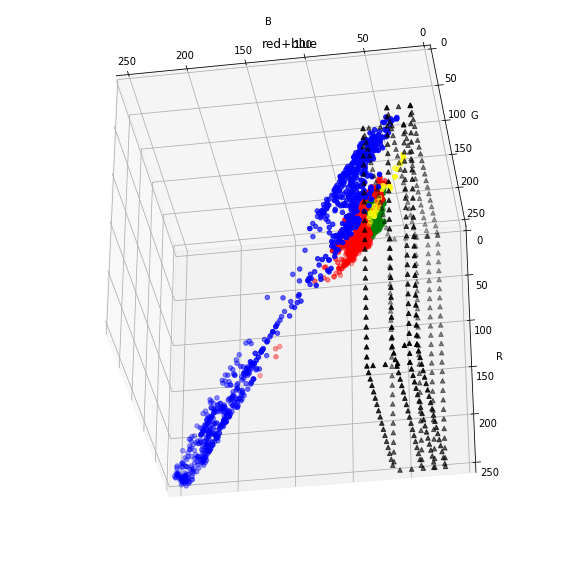

In [341]:
confusionPlotByViews(plotData2, threshes2, figsize = (10,10))

In [318]:
from modules.AnalysisHelpers import ( colorCube
                                    ,SubprocColorCube
                                    ,subprocColorCube
                                    ,multiPlot
                                    )

In [54]:
# colorCube(confData = plotData2, b_single=False)
for i in range(2):
    ret = colorCube(confData = plotData2, b_single=True, b_save=True)
    print '2'

2
2


In [269]:
# ret = colorCube(confData = plotData2, b_save=True, figsize = (10, 10), spaceDefined={'x':[0,150],'y':[0,150],'z':[0,150]})

In [271]:
def bytesToPic(bPic):
    arr = np.asarray(bytearray(bPic), dtype=np.uint8)
    pic = cv2.imdecode(arr, 1)
    return pic

In [305]:
def biggerPic(img, figsize = (15,15)):
    
    # do imshow with a resize
    fig, ax = plt.subplots(1,1, figsize=figsize)
    _img = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)
    ax.imshow(_img)
    
    #remove the black frame  / tick marks around the figure
    ax.tick_params(axis='x', colors=(0,0,0,0))
    ax.tick_params(axis='y', colors=(0,0,0,0))
    plt.box(False)
    
    plt.show()

In [306]:
def croppedPic(pic):
    deltaCrop = int( (float(1.9)/float(15.0)) * pic.shape[0]   )
    h,w = pic.shape[:2]
    pic_copy = pic.copy()
    crop = pic_copy[deltaCrop:h - deltaCrop,deltaCrop:w - deltaCrop ,:]
    return crop

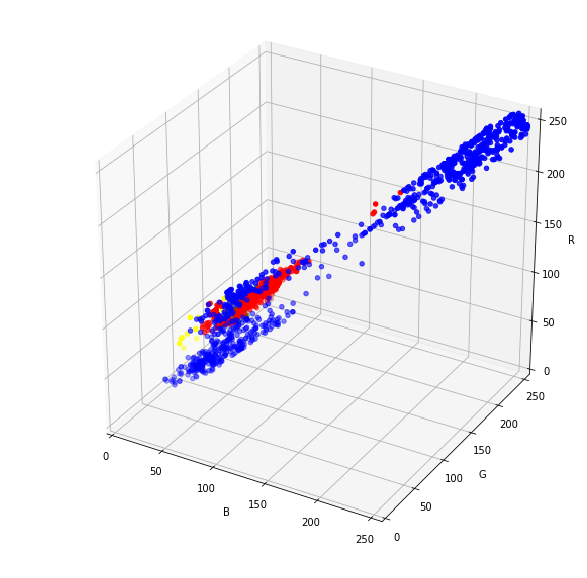

In [342]:
ret = colorCube(confData = plotData2, b_save=True, figsize = (10, 10))
pic = bytesToPic(ret)
pic = croppedPic(pic)
biggerPic(pic,figsize = (10,10))

In [343]:
data = [[pic.copy(), pic.copy()], [pic.copy(), pic.copy()]]

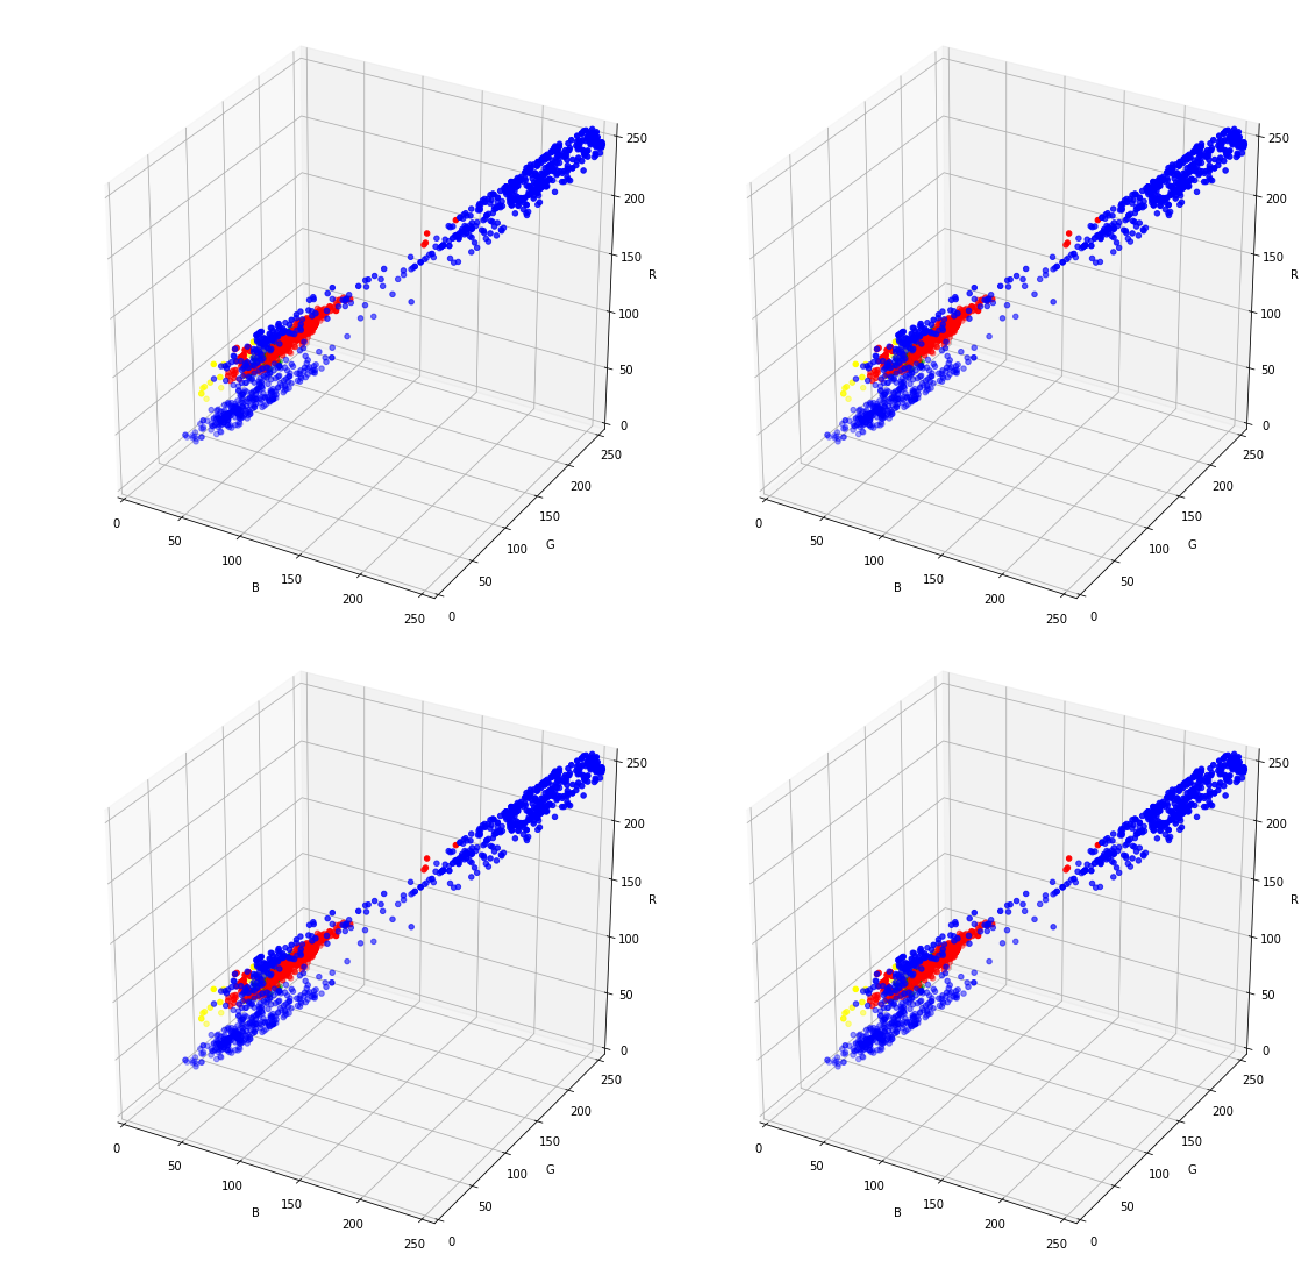

In [344]:
multiPlot(data, figsize = (23,23), hspace = 0, wspace = 0, bGrid=False)

In [331]:
len(ret)

96876

In [225]:
# np.asarray(bytearray(request.read()), dtype=np.uint8)


In [226]:
print type(arr), arr.shape

<type 'numpy.ndarray'> (265296,)


(1500, 1500, 3)


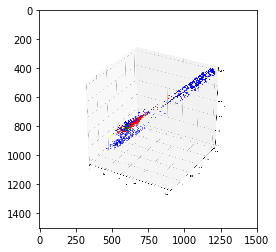

In [239]:
pic = cv2.imdecode(arr, 1)
print pic.shape
plt.imshow(pic)
cvtPlot(pic)

In [233]:
plt.close()

In [236]:
myb = cv2.imread("c:/users/wsutt/desktop/myb2.jpg")
# cvtPlot(myb)

In [250]:
def biggerPic(img, figsize = (15,15)):
    figsize = (15,15)
    fig, ax = plt.subplots(1,1, figsize=figsize)
    _img = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)
    ax.imshow(_img)
    plt.show()

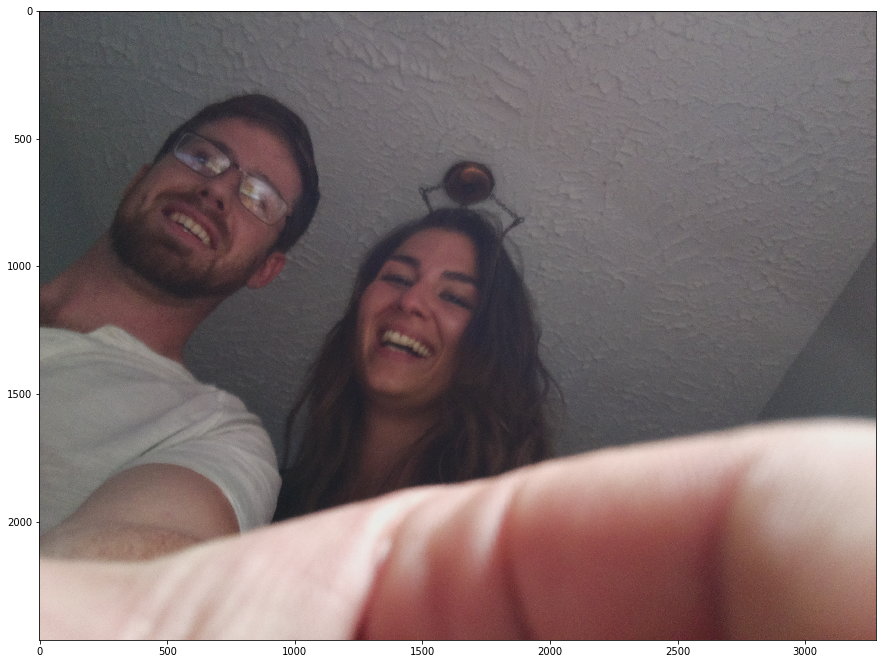

In [251]:
biggerPic(myb)

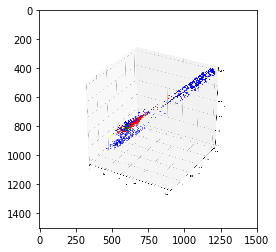

In [265]:
cvtPlot(pic)

In [256]:
pic.shape

(1500, 1500, 3)

In [257]:
pic_cropped.shape

(1300, 1050, 3)

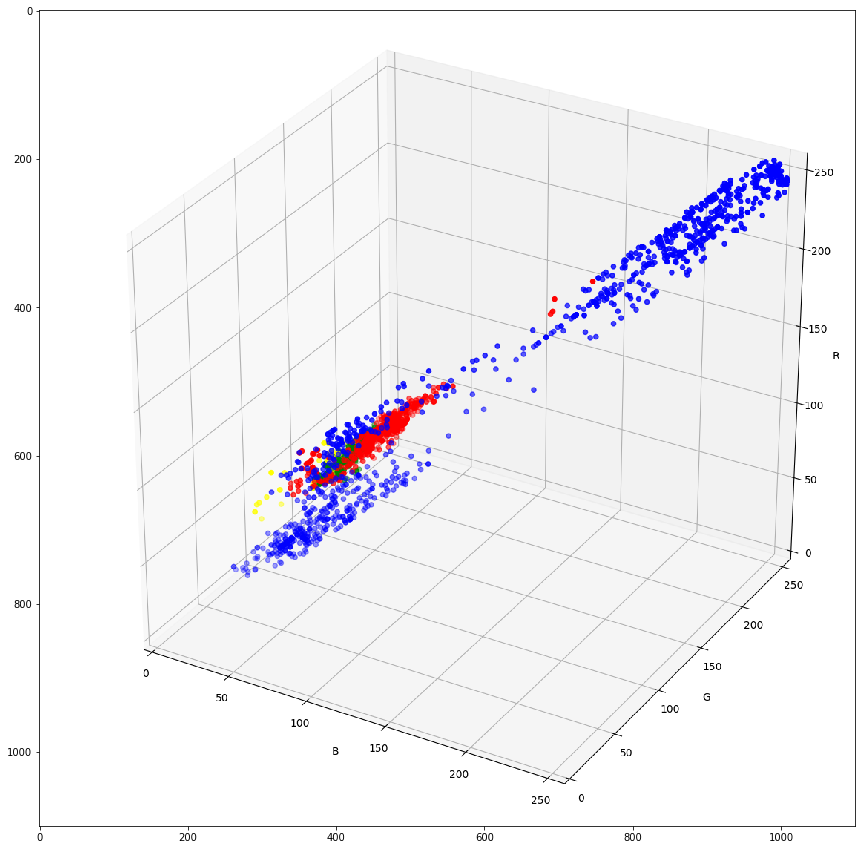

In [267]:
plt.close()
pic_cropped = pic[200:1300,200:1300,:]
biggerPic(pic_cropped)

In [268]:
2.0/15.0

0.13333333333333333

In [189]:
import imutils

In [190]:
pic2 = imutils.resize(pic, width = 1200)

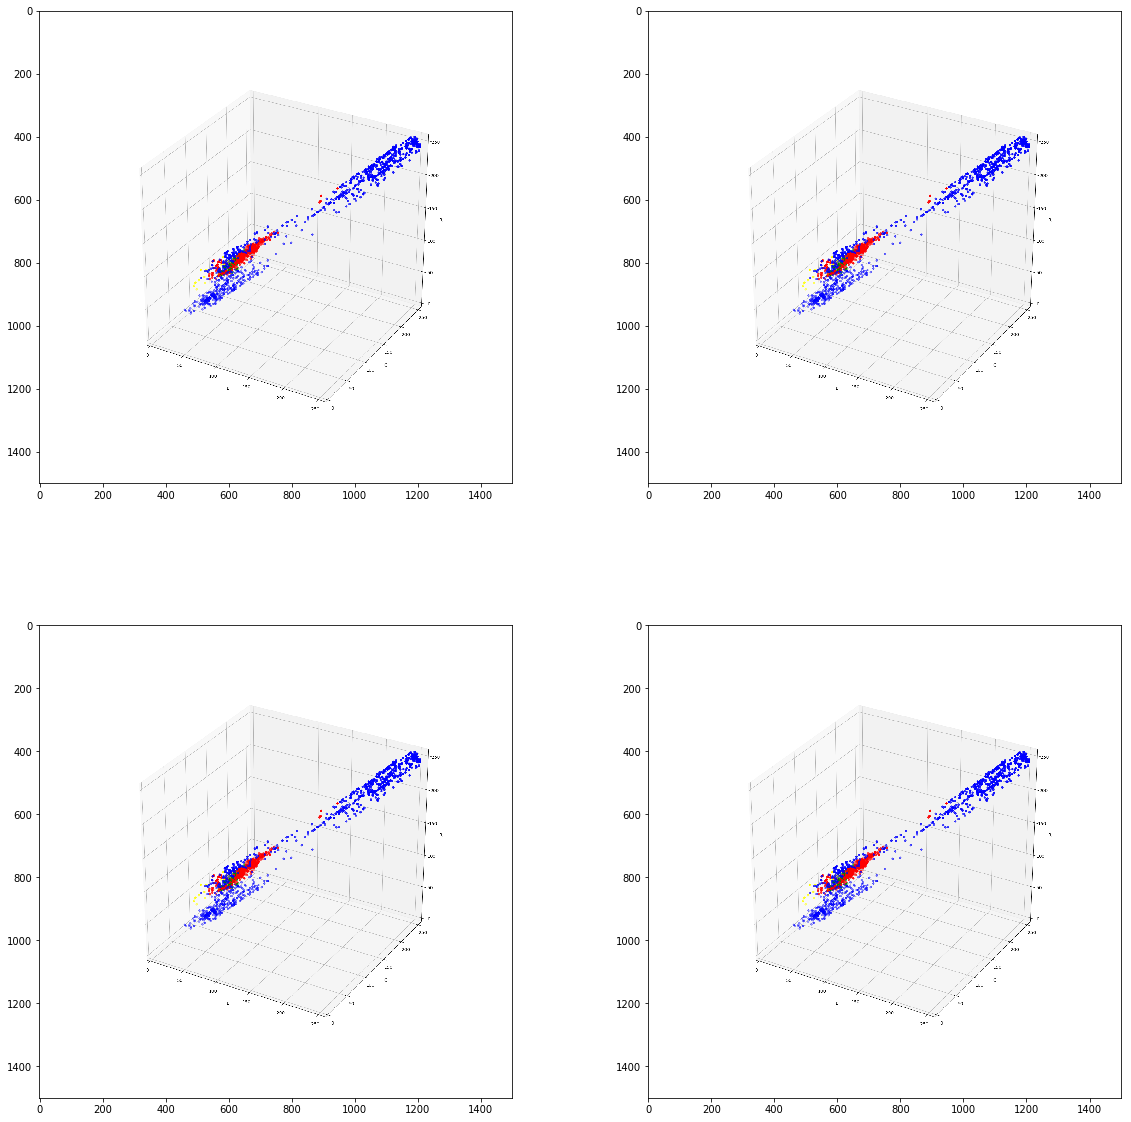

In [232]:
# multiPlot([[pic.copy(), pic.copy()]], figsize=(30,30))
multiPlot([[pic.copy(), pic.copy()],
          [pic.copy(), pic.copy()]], figsize=(20,20))

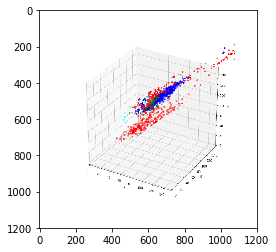

In [192]:
plt.imshow(pic2)

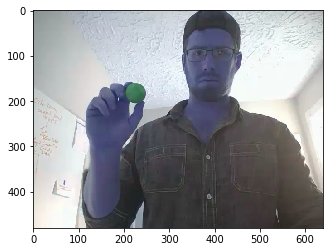

In [193]:
plt.imshow(listGS[0].getOrigFrame())

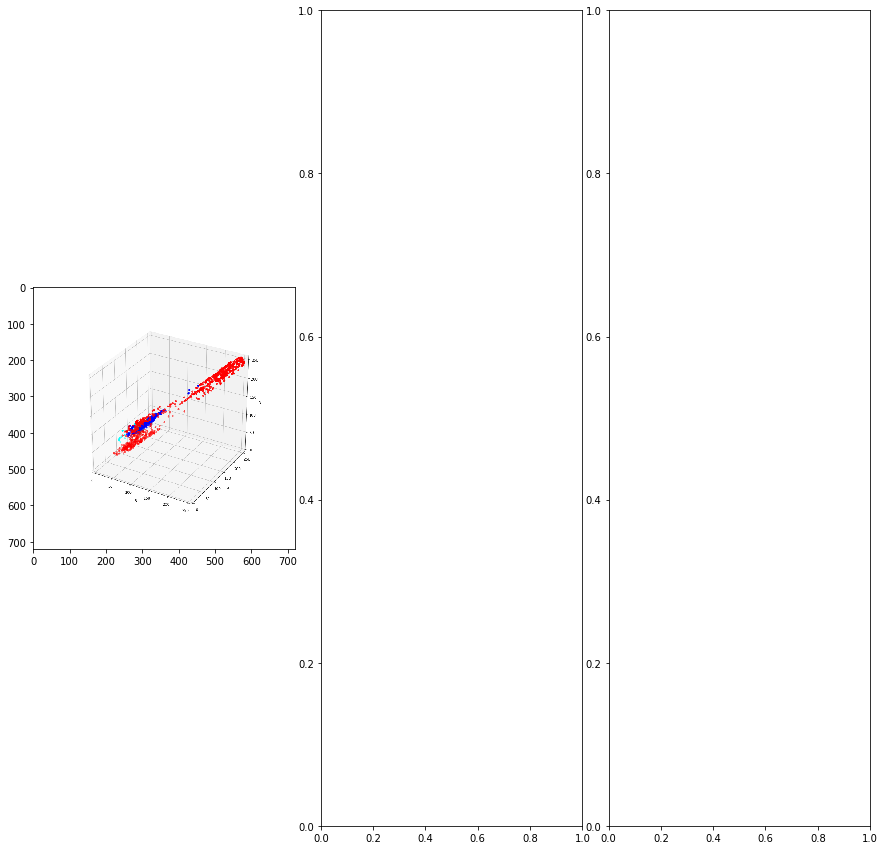

In [180]:
figsize = (15,15)
h,w, = 1,3
fig, ax = plt.subplots(h,w, figsize=figsize)
fig.subplots_adjust(wspace=0.1)
ax[0].imshow(pic)
plt.show()

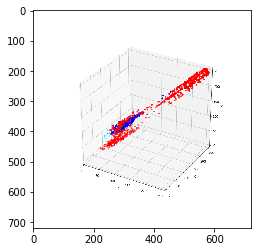

In [181]:
plt.imshow(cv2.imread("../data/usr/plt1.png"))

In [103]:
from modules.AnalysisHelpers import multiPlot

In [148]:
list_list_imgs = [[pic.copy(),pic.copy()], [pic.copy(),pic.copy()]]

In [156]:
list_list_imgs = [[pic.copy(),pic.copy(), pic.copy(),pic.copy()]]

In [157]:
list_list_imgs = [[pic.copy(),pic.copy(), pic.copy(),pic.copy()], [pic.copy(),pic.copy(), pic.copy(),pic.copy()]]

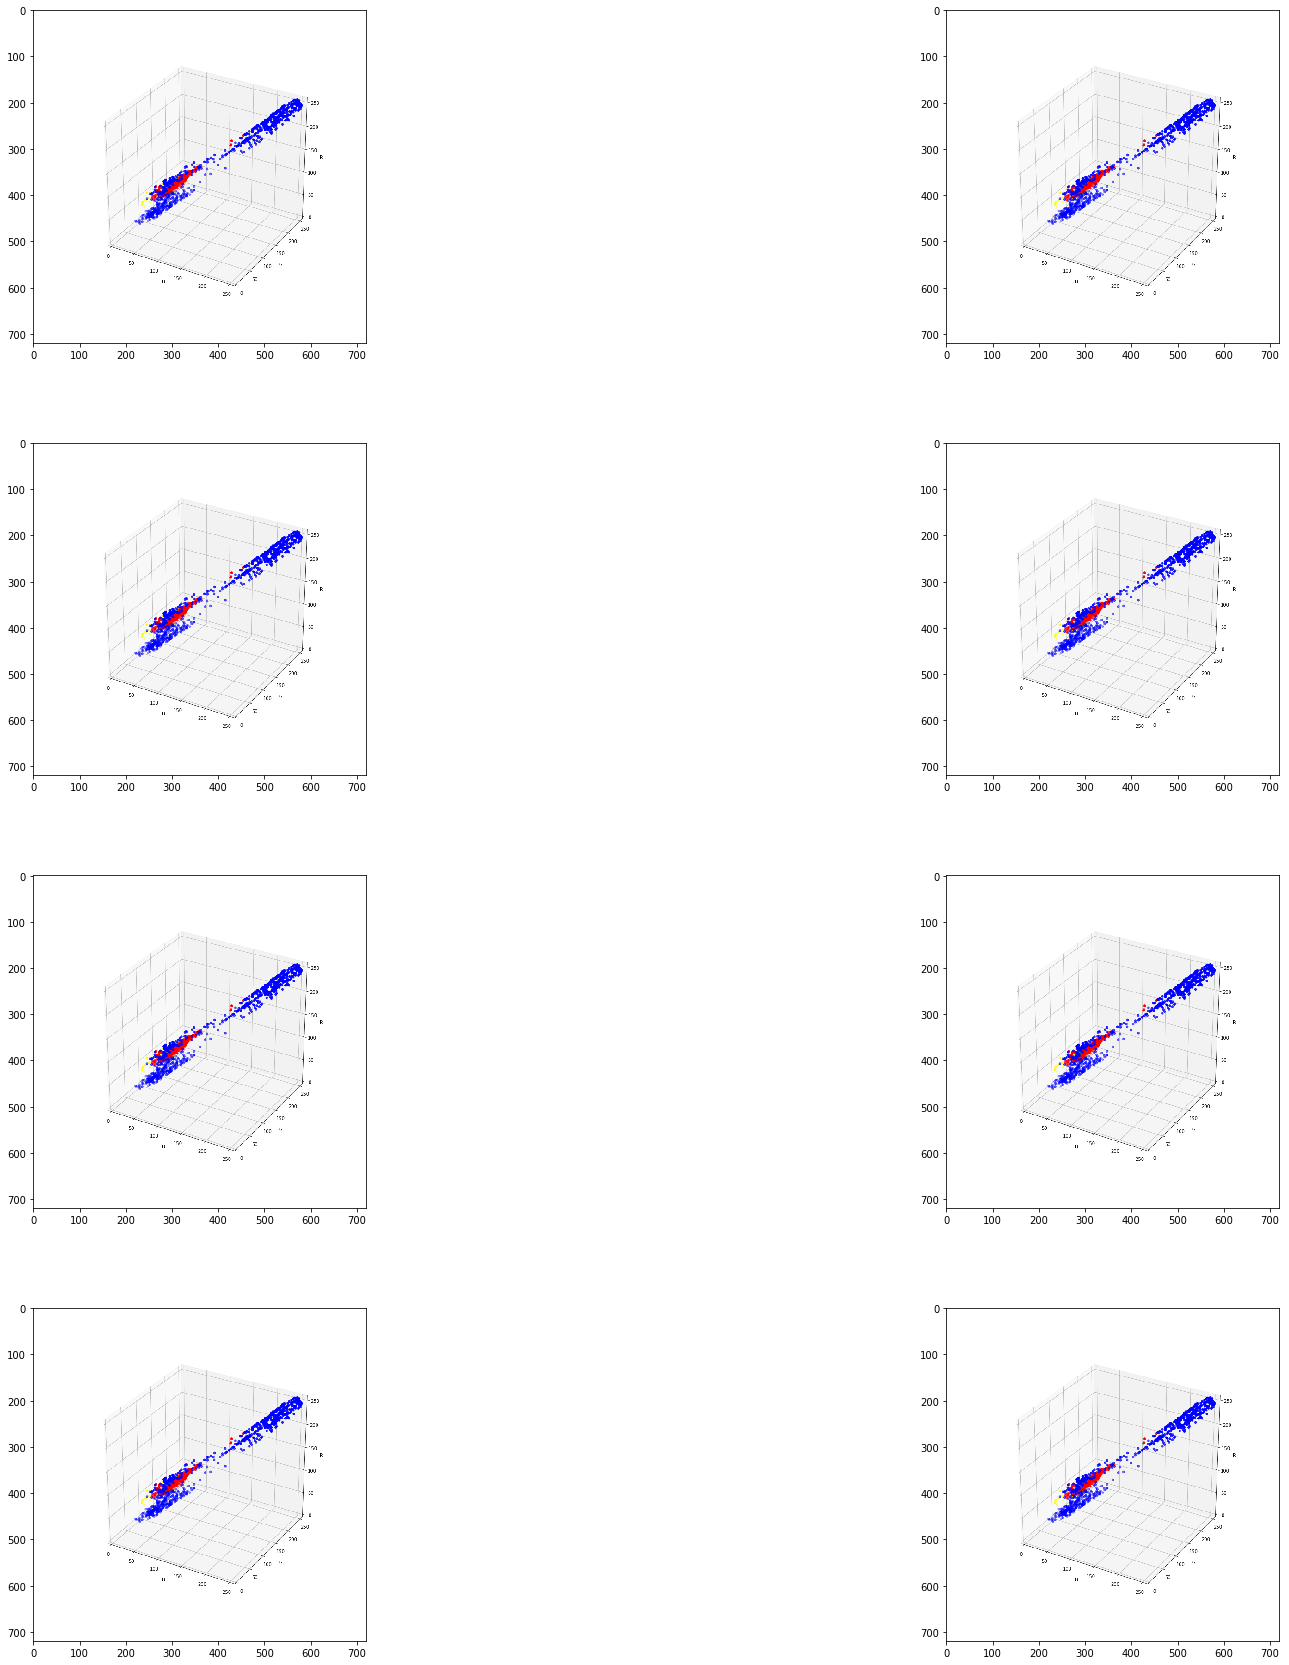

In [159]:
multiPlot(list_list_imgs = list_list_imgs, figsize = (30,30))

(720, 720)

In [66]:
pic

error: C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:9716: error: (-215) scn == 3 || scn == 4 in function cv::cvtColor


TypeError: Invalid dimensions for image data

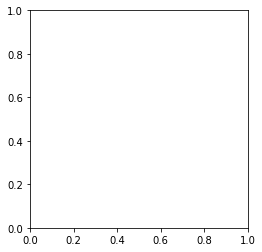

In [60]:
plt.imshow(arr)

In [44]:
from  PIL import Image

TypeError: Image data cannot be converted to float

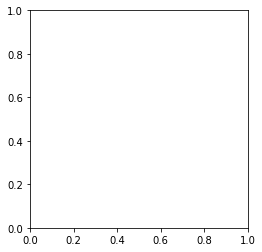

In [46]:
plt.imshow(ret)